# ML End-to-End Project: Classification of Electric Vehicle Population Data

# Goal the project

The project for Machine learning has the goal to create an End-to-End project using teh knowlages during the cource using a data set selected by myself.

In [1]:
%matplotlib inline

In [2]:
import re
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

import seaborn as sns

import mlflow.sklearn

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.decomposition import PCA

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_recall_fscore_support

from sklearn.svm import SVC

import mlflow
from mlflow.models import infer_signature

from utility import *
from plots import *




# Data Set
This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).
https://www.kaggle.com/datasets/rajkumarpandey02/electric-vehicle-population-data/data



# Workflow To Be Followed

- Step 1: Loading The Dataset
- Step 2: Performing EDA
- Step 3: Feature Engineering
- Step 4: Model Training & Evaluation 

Preparing and run the mlflow instance to log the results of the experements. For each run is set a name of the run with the changes or the target of the run

In [3]:
#experiment = mlflow.create_experiment(name = "LinearRegression_Pipeline")
# If the experement exist
#experiment = mlflow.get_experiment_by_name("LinearRegression_Pipeline")
#experiment = mlflow.get_experiment_by_name("SVC_Pipeline")
experiment = mlflow.get_experiment_by_name("LinearRegression_Pipeline")
#experiment_id = experiment.experiment_id
#experiment = mlflow.set_experiment("LinearRegression_Pipeline")

In [4]:
#run_name="LinerRegression_PL_09"
run_name="LinearRegression_PL_16"
description = """
### LinerRegression Run
Changes and adaptations:
- Delete all rows in the column electric_vehicles['Electic Range'] == 0.0
"""

run = mlflow.start_run(experiment_id = experiment.experiment_id, run_name=run_name, description=description)

## Step 1: Loading The Dataset

In [5]:
# Load the data set
electric_vehicles = pd.read_csv("data/Electric_Vehicle_Population_Data.csv")

# Data Preprocessing

The data set contains 17 colums 
1. VIN (1-10)
2. County 	
3. City
4. State
5. Postal Code
6. Model Year
7. Make
8. Model
9. Electric Vehicle Type
10. Clean Alternative Fuel Vehicle (CAFV) Eligibility
11. Electric Range
12. Base MSRP
13. Legislative District
14. DOL Vehicle ID
15. Vehicle Location
16. Electric Utility
17. 2020 Census Tract

In [6]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10


Check the data type of each column. Which column is has the data type object and which has the data type of number (float64 and int64)

In [7]:
electric_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         135038 non-null  object 
 1   County                                             135030 non-null  object 
 2   City                                               135030 non-null  object 
 3   State                                              135038 non-null  object 
 4   Postal Code                                        135030 non-null  float64
 5   Model Year                                         135038 non-null  int64  
 6   Make                                               135038 non-null  object 
 7   Model                                              134789 non-null  object 
 8   Electric Vehicle Type                              135038 non-null  object

In [8]:
#Check for each column if null/None/NaN is existing 
electric_vehicles.isnull().sum()

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64

Drop the NaN rows (8 rows)

Delete all rows with in column electric_vehicles['Electic Range'] == 0.0

In [9]:
electric_vehicles = electric_vehicles[(electric_vehicles[['Electric Range']] != 0).all(axis=1)]

In [10]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
5,WBY7Z8C5XJ,Chelan,Manson,WA,98831.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97.0,0.0,12.0,215122904,POINT (-120.1531 47.88550500000008),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135029,1G1RD6S56H,Clark,Vancouver,WA,98682.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,17.0,140190424,POINT (-122.51464729999998 45.67862000000008),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
135030,1C4JJXN68P,King,Seatac,WA,98148.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,33.0,235938776,POINT (-122.32806 47.46155),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
135032,5YJ3E1EC4L,Snohomish,Edmonds,WA,98020.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308.0,0.0,32.0,3315315,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [11]:
#electric_vehicles = electric_vehicles.dropna(subset=['County', 'City', 'Postal Code', 'Electric Utility', '2020 Census Tract'])

In [12]:
#electric_vehicles.isnull().sum()

As we can see in some of the colums NaN are existing. The NaN will be manage for each Column separately. 
The easier way be not eliminate for the complete data set all rows which contains NaN. It is beeter first to analyse each column with NaN values before to drop all NaN values
with the function __dropna()__
We can assume that the columns _County_, _City_ and _Postal Code_ have NaN in the same rows, because of the dependancies between _Country_, _City_ and _Postal Code_ 

# Feature Engineering

## Definition of all global functions
TODO Morve to sepaaret file

In [13]:
#def add_priority_numbers(df, column_name):
#    column_counts = df[column_name].value_counts()
#    total_number_of_unique = len(column_counts)
#    priority_numbers = {value: total_number_of_unique - rank + 1 for rank, value in enumerate(column_counts.index, start=1)}
#    df[column_name + '_priority'] = df[column_name].map(priority_numbers)
#    return df

#def fill_in_colum_with_unknown(df, column_name):
#    column_values = df[column_name].fillna('Unknown')
#    df[column_name] = column_values
#    return  df

#def fill_in_colum_with_postal_code_unknown(df):
#    column_values = df['Postal Code'].fillna('00000.0')
#    df['Postal Code'] = column_values
#    return  df

#def execute_one_hod_encoder(df, column_name):
#    ohe_make = OneHotEncoder()
#    encoded_cafv = ohe_make.fit_transform(df[column_name].values.reshape(-1, 1)).toarray()
#    ohe_df = pd.DataFrame(encoded_cafv, columns=ohe_make.get_feature_names_out())
#    df = pd.concat([df, ohe_df], axis=1)
#    return df

#def convert_vin_number_to_hach(df, column_name):
#    #column_counts = df[column_name].value_counts()
#    #total_number_of_unique = len(column_counts)
#    #hash_numbers = {hash(value) for value in df[column_name]}
#    df[column_name] = df[column_name].apply(lambda value: hash(value))
#    #df[column_name] = hash_numbers
#    return df

## Feature - VIN (1-10)

Check the unique values of the feature __VIN (1-10)__

In [14]:
len(electric_vehicles['VIN (1-10)'].unique())

6214

If you can see we have 9058 unique values. Using using One-Hot Encoding can lead to a high-dimensional and sparse representation, 
which may pose challenges in terms of computational efficiency and memory usage.

In [15]:
electric_vehicles['VIN (1-10)'].value_counts()

VIN (1-10)
5YJ3E1EB6J    330
5YJ3E1EB3J    329
5YJ3E1EB5J    327
5YJ3E1EB0J    326
5YJ3E1EB1J    325
             ... 
SADHC2S13K      1
WBA5P9C04N      1
3MW5P7J07M      1
KMHE14L27H      1
KMHC75LH9H      1
Name: count, Length: 6214, dtype: int64

Create a Pipeline for the feature __VIN (1 -10)__

In [16]:
vin_pipeline = Pipeline(steps = [
    ('ohn_vin', FunctionTransformer(func= convert_vin_number_to_hach, kw_args={'column_name':'VIN (1-10)'})),
])

In [17]:
#electric_vehicles = vin_pipeline.fit_transform(electric_vehicles)

Using the OneCodeEncoding for the feature __VIN__ got the MemmoryError: Unable to allocate 9.11 GiB for an array with shape (9059, 135038) and data type float64

In [18]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
5,WBY7Z8C5XJ,Chelan,Manson,WA,98831.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97.0,0.0,12.0,215122904,POINT (-120.1531 47.88550500000008),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135029,1G1RD6S56H,Clark,Vancouver,WA,98682.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,17.0,140190424,POINT (-122.51464729999998 45.67862000000008),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
135030,1C4JJXN68P,King,Seatac,WA,98148.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,33.0,235938776,POINT (-122.32806 47.46155),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
135032,5YJ3E1EC4L,Snohomish,Edmonds,WA,98020.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308.0,0.0,32.0,3315315,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [19]:
#electric_vehicles['VIN (1-10)'].info()

## Features - County, City and State

Let us look at the column __Country__.
First we should check  the unique values of  the column 'Country' and to print the table (rows) only with the NaN values to see which information will be lost if we drop this rows.

In [20]:
electric_vehicles['County'].isnull().sum()

6

In [21]:
countries_null_rows = electric_vehicles[electric_vehicles['County'].isna()]
countries_null_rows

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
149,1N4AZ0CP1D,NaN,NaN,AP,NaN,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,NaN,112277063,NaN,NaN,NaN
116884,JTDKARFP2H,NaN,NaN,TX,NaN,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,NaN,205594980,NaN,NaN,NaN
124298,5YJ3E1EBXJ,NaN,NaN,CA,NaN,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,NaN,345290382,NaN,NaN,NaN
126131,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,98950.0,NaN,143609049,NaN,NaN,NaN
131491,JTDKN3DP5E,NaN,NaN,CA,NaN,2014,TOYOTA,PRIUS PLUG-IN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,0.0,NaN,476092333,NaN,NaN,NaN
131586,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,NaN,475254825,NaN,NaN,NaN


In [22]:
#electric_vehicles['County'] = electric_vehicles['County'].fillna('Unknown')

In [23]:
electric_vehicles['County'].isnull().sum()

6

In [24]:
electric_vehicles['County'].unique()

array(['Thurston', 'Snohomish', 'King', 'Chelan', 'Kitsap', 'Yakima',
       'Marin', 'Whitman', 'Island', 'Skagit', 'Pend Oreille', 'Pierce',
       'Maricopa', 'Douglas', 'Grant', nan, 'Spokane', 'Clark',
       'San Juan', 'Clallam', 'Cowlitz', 'Whatcom', 'Lewis', 'Benton',
       'Walla Walla', 'Jefferson', 'Okanogan', 'Mason', 'Garfield',
       'Skamania', 'Franklin', 'Kittitas', 'Klickitat', 'Adams',
       'Grays Harbor', 'Kings', 'Pacific', 'Wahkiakum', 'Ferry',
       'Stevens', 'Asotin', 'Lake', 'Leavenworth', 'San Diego', 'Fairfax',
       'Lincoln', 'District of Columbia', 'Los Angeles', 'Anne Arundel',
       'Galveston', 'Kern', 'Virginia Beach', 'Contra Costa', 'Salt Lake',
       "St. Mary's", 'Chesapeake', 'Moore', 'St. Clair', 'Columbia',
       'Portsmouth', 'Ray', 'Riverside', "Prince George's",
       'San Bernardino', 'El Paso', 'Stafford', 'Pulaski', 'Hillsborough',
       'Richmond', 'Howard', 'Orange', 'Burlington', 'Honolulu',
       'Charleston', 'Alameda', 

In [25]:
electric_vehicles['County'].value_counts()

County
King            39379
Snohomish        8038
Pierce           5997
Clark            4898
Thurston         3099
                ...  
Plaquemines         1
Newport News        1
Hawaii              1
Yavapai             1
Nassau              1
Name: count, Length: 137, dtype: int64

If we can see there are 170 countries. Now is the question, how we can transform the countries to a number as categories? If we use the __LabelEncoder__ provided by the sklearn library, so
all countries will be assign to unique numerical label in the feature. The problem is that __LabelEncoder__ is appropriate when there is an ordinal relationship between the categories (i.e., one category is greater than or less than another). In our case this can be a problem for some of the machine algorithms, because using __LabelEncoder__ might introduce unintended relationships in the model. 
Another option is to use __OneHotEncoder__. OneHotEncoder is used to convert categorical integer features into one-hot encoded vectors. Each integer value is represented as a binary vector where all values are zero except the index that is marked with a 1. In our case we will inscrease the features with additiolan 170 features. This can be a problem, because of the heigh varians by the learning the model.
So this two solutions maybe are not the correct solution for the column __Country__. So what we want to acheaved? Mainly we want to present the rank of each country base on the saled vehicles in this country. This will be provide us the posibility to clarify how importent is each country and to set the priority of each country.

In [26]:
#def add_priority_numbers(df, column_name):
#    column_counts = df[column_name].value_counts()
#    total_number_of_unique = len(column_counts)
#    priority_numbers = {value: total_number_of_unique - rank + 1 for rank, value in enumerate(column_counts.index, start=1)}
#    df[column_name + '_priority'] = df[column_name].map(priority_numbers)
#    return df


#def fill_in_colum_with_unknown(df, column_name):
#    column_values = df[column_name].fillna('Unknown')
#    df[column_name] = column_values
#    return  df


In [27]:
country_pipeline = Pipeline(steps = [
    ('fill_na', FunctionTransformer(func= fill_in_colum_with_unknown, kw_args={'column_name': 'County'})),
    ('add_priority_numbers', FunctionTransformer(func= add_priority_numbers, kw_args={'column_name':'County'})),
    #('create_matrix', FunctionTransformer(func= lambda x: x.todence()))
])

In [28]:
#country_pipeline.fit_transform(electric_vehicles)

In [29]:
electric_vehicles['County'].isnull().sum()

6

In [30]:
city_pipeline = Pipeline(steps = [
    ('fill_na', FunctionTransformer(func= fill_in_colum_with_unknown, kw_args={'column_name': 'City'})),
    ('add_priority_numbers', FunctionTransformer(func= add_priority_numbers, kw_args={'column_name':'City'})),
])

In [31]:
state_pipeline = Pipeline(steps = [
    ('add_priority_numbers', FunctionTransformer(func= add_priority_numbers, kw_args={'column_name':'State'})),
])

## Feature - Postal Code

In [32]:
#def fill_in_colum_with_postal_code_unknown(df):
#    column_values = df['Postal Code'].fillna('00000.0')
#    df['Postal Code'] = column_values
#    return  df

In [33]:
postal_code_pipeline = Pipeline(steps = [
    ('fill_na', FunctionTransformer(func= fill_in_colum_with_postal_code_unknown)),
])

## Feature - Vehicle Location

In [34]:
electric_vehicles[electric_vehicles['Vehicle Location'].isnull()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
149,1N4AZ0CP1D,NaN,NaN,AP,NaN,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,NaN,112277063,NaN,NaN,NaN
95015,JTDKARFP1H,Pacific,Long Beach,WA,98634.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,19.0,171247282,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
116884,JTDKARFP2H,NaN,NaN,TX,NaN,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,NaN,205594980,NaN,NaN,NaN
124298,5YJ3E1EBXJ,NaN,NaN,CA,NaN,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,NaN,345290382,NaN,NaN,NaN
126131,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,98950.0,NaN,143609049,NaN,NaN,NaN
131491,JTDKN3DP5E,NaN,NaN,CA,NaN,2014,TOYOTA,PRIUS PLUG-IN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,0.0,NaN,476092333,NaN,NaN,NaN
131586,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,NaN,475254825,NaN,NaN,NaN


For 8 of the vehicle location can not be find out the correct location, becase the __county__, __city__ and __state__ are missing. 
There are two options 
- to drop the rows or
- to define a __Unknow__ state for points: __POINT (000.00000000000000 00.00000000000000)__

Option two will be use , becasue of the strategy following until now to replace NaN with __Unkonow__ values dependace of the format.

In [35]:

# Extract the latitude and longitude from the 'Vehicle Location' column

#def extract_coordinates(x, index):
#    coords = re.findall(r'-?\d+\.\d+', x)
#    if len(coords) >= 2:
#        return float(coords[index])
#    else:
#        return None

# unpack the coordinates 
#def unpack_coordinates(df):
#    # Convert the 'Vehicle Location' column to string type
#    df['Vehicle Location'] = df['Vehicle Location'].astype(str)
#    df['Longitude'] = df['Vehicle Location'].apply(lambda x: extract_coordinates(x, 0))
#    df['Latitude'] = df['Vehicle Location'].apply(lambda x: extract_coordinates(x, 0))
#    return df



#def fill_in_colum_with_point_unknown(df):
#    column_values = df['Vehicle Location'].fillna('POINT (000.00000000000000 00.00000000000000)')
#    df['Vehicle Location'] = column_values
#    return  df
    

Create a Pipeline for the feature __Vehicle Location__

In [36]:
vehicle_location_feature_pipeline = Pipeline(steps = [
    ('fill_in_with_point_unknown', FunctionTransformer(func= fill_in_colum_with_point_unknown)),
    ('unpack_vehicle_location', FunctionTransformer(func= unpack_coordinates))
])

Add to the feture Pipeline

## Feature - Base MSRP

The coulumn __Base MSRP__ contanins more as 95% of zeror or 95% of the information about the price is missing. 

In [37]:
electric_vehicles['Base MSRP'].value_counts()

Base MSRP
0.0         74629
69900.0      1432
31950.0       400
52900.0       214
32250.0       152
54950.0       136
59900.0       127
39995.0       122
36900.0       100
44100.0        97
64950.0        86
45600.0        75
33950.0        74
52650.0        63
34995.0        63
55700.0        51
36800.0        49
53400.0        36
110950.0       20
98950.0        20
81100.0        18
90700.0        17
75095.0        16
102000.0       15
43700.0        11
184400.0       11
109000.0        7
89100.0         6
32995.0         3
91250.0         3
845000.0        1
Name: count, dtype: int64

In [38]:
electric_vehicles['Base MSRP'].isnull().sum()

1

Replace the NaN with zero

In [39]:
#def fill_in_colum_with_zero(df, column_name, to_fill_value):
#    column_values = df[column_name].fillna(to_fill_value)
#    df[column_name] = column_values
#    return  df

In [40]:
electric_vehicles[electric_vehicles['Base MSRP'].isnull()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
59009,WP0BE2A7XP,Jefferson,Port Ludlow,WA,98365.0,2023,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,24.0,238952402,POINT (-122.68722849999995 47.928152400000045),BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,5.303195e+10


In [41]:
#def create_price_range_category(df, column='Base MSRP'):
#    def categorize_price(price):
#        if 0 <= price <= 25000 :
#            return 0
#        elif 25000 < price <= 40000:
#            return 1
#        elif 40000 < price <= 60000:
#            return 2
#        else:
#            return 3

#    df['Price_Range_Category'] = df[column].apply(categorize_price)
#    return df

Create a Pipeline for the feature __Base MSRP__

In [42]:
base_msrp_feature_pipeline = Pipeline(steps = [
    ('fill_in_with_zero', FunctionTransformer(func = fill_in_colum_with_zero, kw_args={'column_name':'Base MSRP', 'to_fill_value': 0})),
    ('create_price_range_category', FunctionTransformer(func= create_price_range_category))
])

## Feature - Legislative District

In [43]:
electric_vehicles['Legislative District'].isnull().sum()

197

In [44]:
electric_vehicles['Legislative District'].value_counts()

Legislative District
41.0    4782
45.0    4520
48.0    3981
36.0    3472
46.0    3296
43.0    3127
1.0     2943
5.0     2938
11.0    2706
34.0    2520
37.0    2457
18.0    2156
22.0    2119
40.0    2093
23.0    1995
32.0    1865
44.0    1742
21.0    1666
26.0    1587
10.0    1503
17.0    1390
24.0    1347
31.0    1246
42.0    1245
49.0    1207
35.0    1190
47.0    1169
27.0    1150
33.0    1095
39.0    1093
28.0    1048
8.0      905
2.0      859
30.0     855
38.0     785
25.0     767
6.0      765
20.0     762
12.0     728
4.0      641
29.0     556
14.0     553
19.0     543
13.0     532
16.0     470
9.0      447
3.0      422
7.0      421
15.0     199
Name: count, dtype: int64

Unknown will be set to 0 ,bcause the values if start with 1

In [45]:
electric_vehicles['Legislative District'].min()

1.0

In [46]:
electric_vehicles['Legislative District'].max()

49.0

Create a pipeline for the column __Legislative District__

In [47]:
legislative_district_feature_pipeline = Pipeline(steps = [
    ('fill_in_with_zero', FunctionTransformer(func = fill_in_colum_with_zero, kw_args={'column_name':'Legislative District', 'to_fill_value': 0})),
])

# Feature - Electric Range

 First filter only the electirc range with value > 0 for the calculation of the mean value. 
Calculate the mean value of the electic range in depandance of the Clean Alternative Fuel Vehicle (CAFV) Eligibility 	
and the Model. So you can calculate the mean value base of the information if the vehicle is a hybrid or electic an base of the model
because each model has different range.

In [48]:
#electric_range_without_zero = electric_vehicle_type["Electric Range"].ne(0)
#electric_range_without_zero = electric_vehicle_type[electric_vehicle_type[['Electric Range']].ne(0).any(1)]
#electric_range_without_zero = electric_vehicle_type[electric_vehicle_type[['Electric Range']].ne(0).any(1)]
electric_range_without_zero = electric_vehicles[electric_vehicles['Electric Range'] != 0.0]

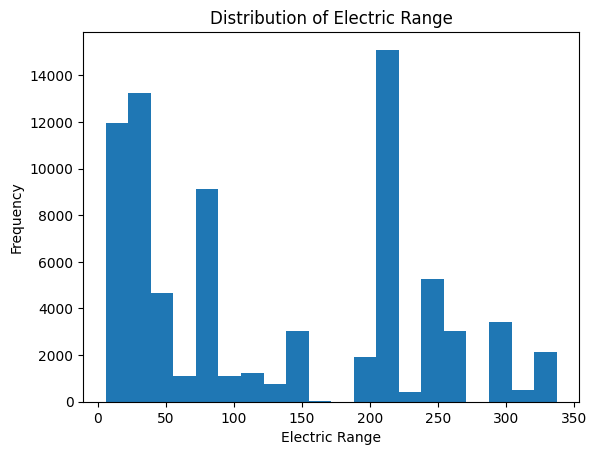

In [49]:
plt.hist(electric_vehicles['Electric Range'], bins=20)
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Range')
plt.show()

In [50]:
electric_range_only_zero = electric_vehicles[electric_vehicles['Electric Range'] == 0.0]

In [51]:
electric_range_only_zero

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [52]:
electric_range_without_zero

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
5,WBY7Z8C5XJ,Chelan,Manson,WA,98831.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97.0,0.0,12.0,215122904,POINT (-120.1531 47.88550500000008),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135029,1G1RD6S56H,Clark,Vancouver,WA,98682.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,17.0,140190424,POINT (-122.51464729999998 45.67862000000008),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
135030,1C4JJXN68P,King,Seatac,WA,98148.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,33.0,235938776,POINT (-122.32806 47.46155),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
135032,5YJ3E1EC4L,Snohomish,Edmonds,WA,98020.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308.0,0.0,32.0,3315315,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [53]:
#electric_vehicle_type.iloc[:, electric_vehicle_type_index] = electric_vehicle_type["Electric Range"].mask(electric_vehicle_type["Electric Range"].eq(0.0), electric_vehicle_type["Electric Range"].mean())
#group_electrical_range = electric_range_without_zero.groupby(['Model','Make', 'Electric Vehicle Type'], as_index=False)['Electric Range'].mean()
#group_electrical_range = electric_range_without_zero.groupby(['Electric Vehicle Type', 'Make'], as_index=False)['Electric Range'].mean()
group_electrical_range = electric_range_without_zero.groupby(['Electric Vehicle Type', 'Model'], as_index=False)['Electric Range'].mean()

TODO Analyse the results with Model, why is not good to use a Model als groupby

In [54]:
group_electrical_range

,Electric Vehicle Type,Model,Electric Range
0,Battery Electric Vehicle (BEV),500,85.646840
1,Battery Electric Vehicle (BEV),B-CLASS,87.000000
2,Battery Electric Vehicle (BEV),BOLT EV,243.622790
3,Battery Electric Vehicle (BEV),CITY,100.000000
4,Battery Electric Vehicle (BEV),E-GOLF,107.091778
...,...,...,...
90,Plug-in Hybrid Electric Vehicle (PHEV),WRANGLER,21.766951
91,Plug-in Hybrid Electric Vehicle (PHEV),X3,17.000000
92,Plug-in Hybrid Electric Vehicle (PHEV),X5,25.547150
93,Plug-in Hybrid Electric Vehicle (PHEV),XC60,23.367764


In [55]:
group_electrical_range.Model.unique()

array(['500', 'B-CLASS', 'BOLT EV', 'CITY', 'E-GOLF', 'E-TRON',
       'E-TRON SPORTBACK', 'EQ FORTWO', 'FOCUS', 'FORTWO',
       'FORTWO ELECTRIC DRIVE', 'HARDTOP', 'I-MIEV', 'I-PACE', 'I3',
       'IONIQ', 'KONA', 'LEAF', 'MODEL 3', 'MODEL S', 'MODEL X',
       'MODEL Y', 'NIRO', 'PS2', 'RANGER', 'RAV4', 'ROADSTER',
       'S-10 PICKUP', 'SOUL', 'SOUL EV', 'SPARK', 'TAYCAN',
       'TRANSIT CONNECT ELECTRIC', '330E', '530E', '740E', '745E',
       '745LE', '918', 'A3', 'A7', 'A8 E', 'ACCORD', 'AVIATOR',
       'BENTAYGA', 'C-CLASS', 'C-MAX', 'CAYENNE', 'CLARITY', 'CORSAIR',
       'COUNTRYMAN', 'CROSSTREK', 'CT6', 'CX-90', 'ELR', 'ESCAPE',
       'FLYING SPUR', 'FUSION', 'GLC-CLASS', 'GLE-CLASS',
       'GRAND CHEROKEE', 'I8', 'KARMA', 'NX', 'OPTIMA', 'OUTLANDER',
       'PACIFICA', 'PANAMERA', 'PRIUS', 'PRIUS PLUG-IN', 'PRIUS PRIME',
       'Q5', 'Q5 E', 'RANGE ROVER', 'RANGE ROVER SPORT', 'RAV4 PRIME',
       'S-CLASS', 'S60', 'S90', 'SANTA FE', 'SONATA', 'SORENTO',
       'SPORTAG

In [56]:
#group_electrical_range.Make.unique()

In [57]:
#for index, row in group_electrical_range.iterrows():
#    electric_vehicles.loc[ electric_vehicles['Electric Range'] > 0.0 and electric_vehicles['Model'] == row['Model'], 'Electric Range'] = row['Electric Range']

for index, row in group_electrical_range.iterrows():
#    mask = (electric_vehicles['Electric Range'] == 0.0) & (electric_vehicles['Make'] == row['Make'])
#    electric_vehicles.loc[mask, 'Electric Range'] = row['Electric Range']
   
    
    mask = (electric_vehicles['Electric Range'] == 0.0) & (electric_vehicles['Model'] == row['Model'])
    electric_vehicles.loc[mask, 'Electric Range'] = row['Electric Range']

In [58]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
5,WBY7Z8C5XJ,Chelan,Manson,WA,98831.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97.0,0.0,12.0,215122904,POINT (-120.1531 47.88550500000008),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135029,1G1RD6S56H,Clark,Vancouver,WA,98682.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,17.0,140190424,POINT (-122.51464729999998 45.67862000000008),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
135030,1C4JJXN68P,King,Seatac,WA,98148.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,33.0,235938776,POINT (-122.32806 47.46155),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
135032,5YJ3E1EC4L,Snohomish,Edmonds,WA,98020.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308.0,0.0,32.0,3315315,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [59]:

#def calculate_mean_value(df):
#    electric_range_without_zero = df[df['Electric Range'] != 0.0]
#    electric_range_only_zero = df[df['Electric Range'] == 0.0]
#    group_electrical_range = electric_range_without_zero.groupby(['Electric Vehicle Type', 'Make'], as_index=False)['Electric Range'].mean()

#    for index, row in group_electrical_range.iterrows():
#        mask = (df['Electric Range'] == 0.0) & (df['Make'] == row['Make'])
#        df.loc[mask, 'Electric Range'] = row['Electric Range']
#        #mask = (electric_vehicles['Electric Range'] == 0.0) & (electric_vehicles['Model'] == row['Model'])
#        #electric_vehicles.loc[mask, 'Electric Range'] = row['Electric Range']
#    return df



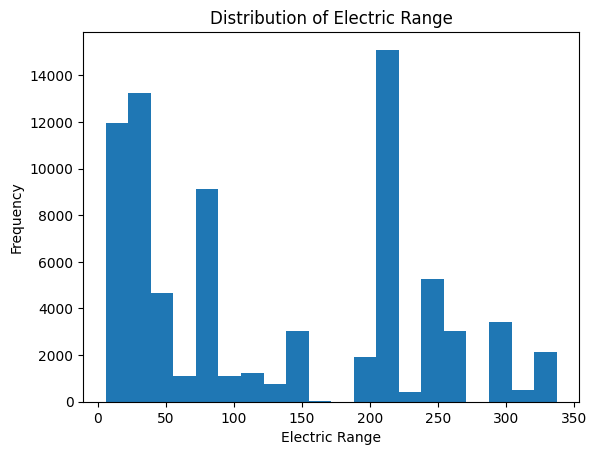

In [60]:
plt.hist(electric_vehicles['Electric Range'], bins=20)
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Range')
plt.show()

Now the number of 0 is reduce from 60.. to XXX. The reason why not all 0s are 
How to mange the rest of the unkown or zeros values?
- Is it possible to find statistic values add there to the set?
- Is it possible to use another grpouping to replace the zeris values? 

In [61]:
electric_range_only_zero = electric_vehicles[electric_vehicles['Electric Range'] == 0.0]

In [62]:
electric_range_only_zero

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [63]:
electric_range_only_zero['Make'].unique()

array([], dtype=object)

In [64]:
electric_vehicles['Electric Range'].eq(0)

0         False
2         False
3         False
4         False
5         False
          ...  
135029    False
135030    False
135032    False
135033    False
135037    False
Name: Electric Range, Length: 78055, dtype: bool

In [65]:
#def plot_value_counts(df, column, top_n=None):
#    # Get the value counts for the specified column
#    value_counts = df[column].value_counts()
    
#    if top_n:
#        value_counts = value_counts.head(top_n)
    
#    # Set up the subplots
#    fig, axes = plt.subplots(1, 2, figsize=(20, 7))
    
#   # Create the pie chart
#   value_counts.plot(kind='pie', ax=axes[0], autopct='%.1f%%', startangle=90, colors=sns.color_palette('pastel'))
#    axes[0].set_ylabel('')
#    axes[0].set_title(f'Percentage of {column}', fontsize=14)
    
#    # Create the bar chart
#    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')
#    axes[1].set_title(f'Count of {column}', fontsize=14)
#    axes[1].set_xlabel(column)
#    axes[1].set_ylabel('Count')
#    axes[1].tick_params(axis='x', rotation=30)

#    for i, v in enumerate(value_counts.values):
#        axes[1].text(i, v + 0.5, str(v), horizontalalignment='center', fontsize=12)
    
#    # Set the suptitle for the entire figure
#    fig.suptitle(f'{column} Distribution', fontsize=18, y=1.03)
    
#    # Show the plots
#    plt.show()

D:\MyTrunk\SoftUni\Machine_Learning_Lab\End-to-End-ML-Project-Electric-Vehicle\plots.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


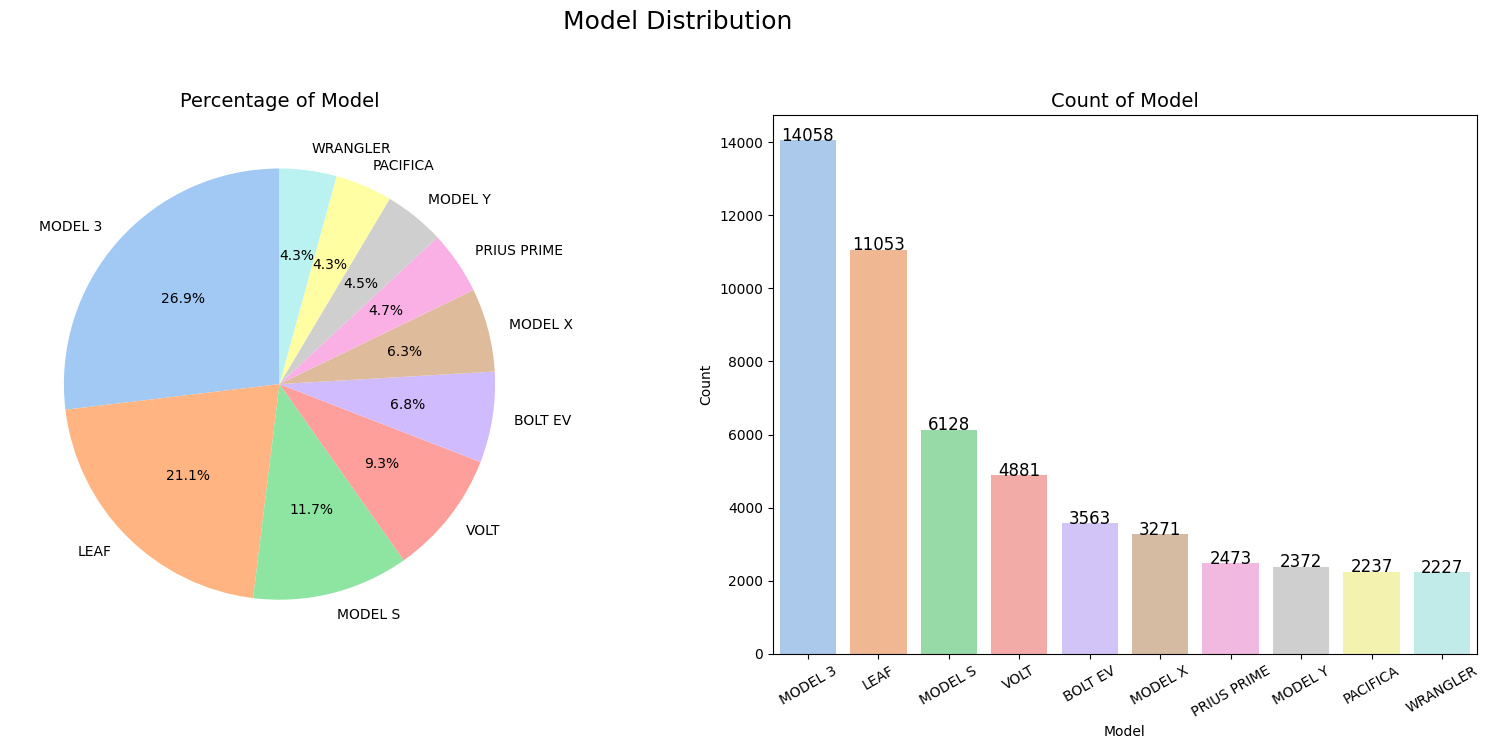

In [66]:
plot_value_counts(electric_vehicles, 'Model', top_n=10)

## Feature Engineering - Electric Range

In [67]:
# Plug-in Hybrid Electric Vehicle (PHEV) = 1
# Battery Electric Vehicle (BEV) = 0
#PHEV = 'Plug-in Hybrid Electric Vehicle (PHEV)'
#BEV = 'Battery Electric Vehicle (BEV)'
#def create_electric_range_category(df, column='Electric Range'):
#    def categorize_range(columns):
#        electric_range = columns['Electric Range']
#        electric_vehicle_type = columns['Electric Vehicle Type']
#        if electric_range == 0:
#            return 0
#        elif 0.0 < electric_range < 50 and electric_vehicle_type == BEV:
#            return 1 #10 #very Short
#        elif 50 <= electric_range <= 100 and electric_vehicle_type == BEV:
#            return 2 #20 #Short
#        elif 100 < electric_range <= 300 and electric_vehicle_type == BEV:
#            return 3 #30 #Medium
#        elif 300 < electric_range <= 550 and electric_vehicle_type == BEV:
#            return 4 #40 #long
#        elif 550 < electric_range and electric_vehicle_type == BEV:
#            return 5 #50 # Extry long
#        elif electric_range < 10 and electric_vehicle_type == PHEV:
#            return 1 #very Short
#        elif 10 <= electric_range <= 50 and electric_vehicle_type == PHEV:
#            return 2 #Short
#        elif 50 < electric_range <= 80 and electric_vehicle_type == PHEV:
#            return 3 #Medium
#        elif 80 < electric_range <= 160 and electric_vehicle_type == PHEV:
#            return 4 #long
#       elif 160 < electric_range and electric_vehicle_type == PHEV:
#           return 5 # Extry lo
#        else:
#            return -1.0

#    df['Electric_Range_Category'] = df.apply(categorize_range, axis=1)
#    return df


In [68]:
#pd.get_dummies(electric_vehicles[["Electric Vehicle Type","Electric_Range_Category"]])

In [69]:
#electric_vehicles.dropna(subset=["Electric Range"])
electric_vehicles = electric_vehicles[electric_vehicles['Electric Range'].notna()]

In [70]:
electric_vehicles['Electric Range'].isna().sum()

0

Create a Pipeline for __Electric Range__

In [71]:
electric_range_feature_pipeline = Pipeline(steps = [
    ('fill_in_with_zero', FunctionTransformer(func = fill_in_colum_with_zero, kw_args={'column_name':'Electric Range', 'to_fill_value': 0})), 
     ('calculate_mean_value', FunctionTransformer(func = calculate_mean_value)),
    ('electric_range_category', FunctionTransformer(func = create_electric_range_category, kw_args={'column':'Electric Range'})),
])

## Feature - 2020 Census Tract

In [72]:
electric_vehicles = electric_vehicles.dropna(subset=['2020 Census Tract'])

In [73]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
5,WBY7Z8C5XJ,Chelan,Manson,WA,98831.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97.0,0.0,12.0,215122904,POINT (-120.1531 47.88550500000008),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135029,1G1RD6S56H,Clark,Vancouver,WA,98682.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,17.0,140190424,POINT (-122.51464729999998 45.67862000000008),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
135030,1C4JJXN68P,King,Seatac,WA,98148.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,33.0,235938776,POINT (-122.32806 47.46155),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
135032,5YJ3E1EC4L,Snohomish,Edmonds,WA,98020.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308.0,0.0,32.0,3315315,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [74]:
features_vehicles_pipeline = FeatureUnion([
    ('country_feature', country_pipeline),
    ('city_feature', city_pipeline),
    ('state_feature', state_pipeline), 
    ('code_pipeline_feature', postal_code_pipeline),
    ('vehicle_location_feature', vehicle_location_feature_pipeline),
    ('base_msrp_feature', base_msrp_feature_pipeline),
    ('legislative_district_feature', legislative_district_feature_pipeline),
    ('electric_range_feature', electric_range_feature_pipeline), 
    ('vin_feature', vin_pipeline),
    #('make_feature', make_pipeline),
    #('cafv_feature', cafv_pipeline),
    #('model_feature', model_pipeline),
    #('electric_vehicle_type_feature', electric_vehicle_type_pipeline),
    #('electric_vehicles_feature', electric_vehicles),
    
])

In [75]:
features_vehicles_pipeline.fit(electric_vehicles)

FeatureUnion(transformer_list=[('country_feature',
                                Pipeline(steps=[('fill_na',
                                                 FunctionTransformer(func=<function fill_in_colum_with_unknown at 0x0000022217187C40>,
                                                                     kw_args={'column_name': 'County'})),
                                                ('add_priority_numbers',
                                                 FunctionTransformer(func=<function add_priority_numbers at 0x0000022217187CE0>,
                                                                     kw_args={'column_name': 'County'}))])),
                               ('city_feature',
                                Pi...
                                                 FunctionTransformer(func=<function calculate_mean_value at 0x00000222171A8360>)),
                                                ('electric_range_category',
                                                 FunctionTransformer(func=<function create_electric_range_category at 0x00000222171A8540>,
                                                                     kw_args={'column': 'Electric '
                                                                                        'Range'}))])),
                               ('vin_feature',
                                Pipeline(steps=[('ohn_vin',
                                                 FunctionTransformer(func=<function convert_vin_number_to_hach at 0x0000022217187F60>,
                                                                     kw_args={'column_name': 'VIN '
                                                                                             '(1-10)'}))]))])

In [76]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
5,WBY7Z8C5XJ,Chelan,Manson,WA,98831.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97.0,0.0,12.0,215122904,POINT (-120.1531 47.88550500000008),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135029,1G1RD6S56H,Clark,Vancouver,WA,98682.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,17.0,140190424,POINT (-122.51464729999998 45.67862000000008),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
135030,1C4JJXN68P,King,Seatac,WA,98148.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,33.0,235938776,POINT (-122.32806 47.46155),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
135032,5YJ3E1EC4L,Snohomish,Edmonds,WA,98020.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308.0,0.0,32.0,3315315,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [77]:
features_vehicles_pipeline.transform(electric_vehicles)

array([[7278236123983864945, 'Thurston', 'Tumwater', ...,
        -122.91310169999997, 0, 4],
       [-7565805028827279520, 'Snohomish', 'Snohomish', ...,
        -122.09150499999998, 0, 4],
       [1573911593358199993, 'King', 'Seattle', ..., -122.32981499999994,
        0, 5],
       ...,
       [-7843051532146782943, 'Snohomish', 'Edmonds', ..., -122.37507, 0,
        5],
       [-2283476841949140944, 'King', 'Yarrow Point', ...,
        -122.20190499999995, 0, 5],
       [9213864270928389044, 'Kitsap', 'Port Orchard', ...,
        -122.63926499999997, 0, 2]], dtype=object)

In [78]:
electric_vehicles['Electric Range'].min()

6.0

In [79]:
electric_vehicles.head

<bound method NDFrame.head of                  VIN (1-10)     County          City State  Postal Code  \
0       7278236123983864945   Thurston      Tumwater    WA      98512.0   
2      -7565805028827279520  Snohomish     Snohomish    WA      98290.0   
3       1573911593358199993       King       Seattle    WA      98134.0   
4      -5220054786819100303  Snohomish       Edmonds    WA      98020.0   
5      -3591062143661377656     Chelan        Manson    WA      98831.0   
...                     ...        ...           ...   ...          ...   
135029  7662250586714151693      Clark     Vancouver    WA      98682.0   
135030  4114441756167477442       King        Seatac    WA      98148.0   
135032 -7843051532146782943  Snohomish       Edmonds    WA      98020.0   
135033 -2283476841949140944       King  Yarrow Point    WA      98004.0   
135037  9213864270928389044     Kitsap  Port Orchard    WA      98366.0   

        Model Year       Make     Model  \
0             2019      TE

In [80]:
electric_vehicles['Electric_Range_Category']

0         4
2         4
3         5
4         4
5         3
         ..
135029    3
135030    2
135032    5
135033    5
135037    2
Name: Electric_Range_Category, Length: 78048, dtype: int64

## Feature Model

In the column __Model__ are listest the models of makes. First we have to analyse if the column __Model__ contains NaN values

In [81]:
electric_vehicles.Model.isnull().sum()

0

There are 249 rows with the the value NaN in the column __Model__. Now we have to check for each make (column __Make__) the model is missing.

In [82]:
electric_vehicles_make_with_NaN = electric_vehicles[electric_vehicles['Model'].isna()]

In [83]:
electric_vehicles_make_with_NaN

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,Vehicle Location,Electric Utility,2020 Census Tract,County_priority,City_priority,State_priority,Longitude,Latitude,Price_Range_Category,Electric_Range_Category


In [84]:
electric_vehicles_make_with_NaN['Make']

Series([], Name: Make, dtype: object)

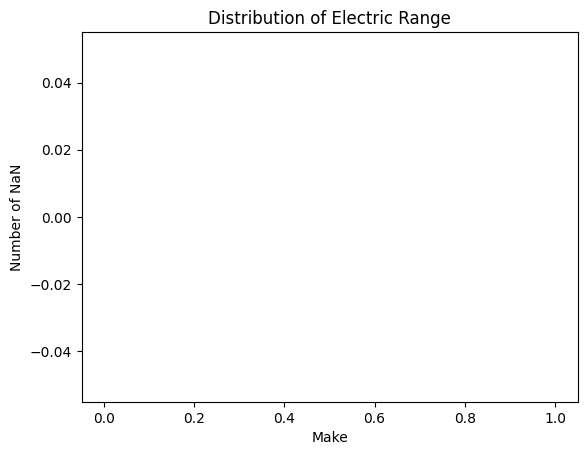

In [85]:
plt.hist(electric_vehicles_make_with_NaN['Make'], bins=20)
plt.xlabel('Make')
plt.ylabel('Number of NaN')
plt.title('Distribution of Electric Range')
plt.show()

If we can see the missing models are only from one __Make__ _Volvo_. We can delete this 240 rows, but we will lost information. So for the first loop the NaN will be replace with the value __Unknown__

The next step is to anylyse how we can catagorize the unique values of the __Models__ to numbers, that the machine leanring algorithmus can understand correctly.

In [86]:
len(electric_vehicles.Model.unique())

92

Now the question is which technic we can use fot the categorarization:
- OneHotEncoder - in this case we will create additional 126 colums. Later if needed we can reduce the number of the columns using another algorithmns and strategy to get better results.
- LabelEncoder - LabelEncoder could imply an ordinal relationship between the __Models__, which might not be accurate
- Set the Priority like the solution for __Country__, __City__ and __State__ - More as one model can have the same priority.
- another solution

First we will try with __OneHotEncoder__, because of the probems of the another solutions, that can be follow the missunderstanding the data by the learning process.

In [87]:
electric_vehicles.Model.value_counts()

Model
MODEL 3        14056
LEAF           11052
MODEL S         6128
VOLT            4881
BOLT EV         3563
               ...  
BENTAYGA           2
A8 E               2
FLYING SPUR        1
918                1
S-10 PICKUP        1
Name: count, Length: 92, dtype: int64

Create a pipeline for the frature __Model__

In [88]:
model_pipeline = Pipeline(steps = [
    ('fill_na', FunctionTransformer(func= fill_in_colum_with_unknown, kw_args={'column_name': 'Model'})),
    ('ohn_model', FunctionTransformer(func= execute_one_hod_encoder, kw_args={'column_name':'Model'})),
])

In [89]:
electric_vehicles = model_pipeline.fit_transform(electric_vehicles)

In [90]:
electric_vehicles.shape

(111073, 116)

## Feature - Make 	

In [91]:
electric_vehicles.Make.unique()

array(['TESLA', 'BMW', 'AUDI', 'TOYOTA', 'NISSAN', 'KIA', 'FIAT', 'FORD',
       'CHEVROLET', 'HYUNDAI', 'VOLVO', 'VOLKSWAGEN', 'CHRYSLER', 'SMART',
       'JEEP', 'HONDA', 'LINCOLN', 'PORSCHE', 'MITSUBISHI', 'POLESTAR',
       'MINI', 'MERCEDES-BENZ', 'JAGUAR', 'CADILLAC', 'LEXUS',
       'WHEEGO ELECTRIC CARS', 'SUBARU', 'FISKER', 'MAZDA', 'BENTLEY',
       'TH!NK', 'LAND ROVER', 'AZURE DYNAMICS', nan], dtype=object)

In [92]:
len(electric_vehicles.Make.unique())

34

In [93]:
electric_vehicles.Make.isnull().sum()

33025

In [94]:
#def execute_one_hod_encoder(df, column_name):
#    ohe_make = OneHotEncoder()
#    encoded_cafv = ohe_make.fit_transform(df[column_name].values.reshape(-1, 1)).toarray()
#    ohe_df = pd.DataFrame(encoded_cafv, columns=ohe_make.get_feature_names_out())
#    df = pd.concat([df, ohe_df], axis=1)
#    return df

    

In [95]:
make_pipeline = Pipeline(steps = [
    ('ohn_make', FunctionTransformer(func= execute_one_hod_encoder, kw_args={'column_name':'Make'})),
])

#make_pipeline_ct = ColumnTransformer([
    #('ohe_make', OneHotEncoder(), ['Make']),
#    ('ohn_make', FunctionTransformer(func= execute_one_hod_encoder, kw_args={'column_name':'Make'}), ['Make']),
    
#])

In [96]:
electric_vehicles = make_pipeline.fit_transform(electric_vehicles)

Check if the number of the columns is increase with the number of the makes (36 unique makes)

In [97]:
electric_vehicles.shape

(124950, 150)

## Feature - Clean Alternative Fuel Vehicle (CAFV) Eligibility

In [98]:
electric_vehicles['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range', nan], dtype=object)

In [99]:
cafv_pipeline = Pipeline(steps = [
    ('ohn_cafv', FunctionTransformer(func= execute_one_hod_encoder, kw_args={'column_name':'Clean Alternative Fuel Vehicle (CAFV) Eligibility'})),
])

In [100]:
electric_vehicles = cafv_pipeline.fit_transform(electric_vehicles)

In [101]:
electric_vehicles.shape

(130725, 153)

## Feature - Electric Vehicle Type

In [102]:
electric_vehicles['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)', nan], dtype=object)

In [103]:
electric_vehicle_type_pipeline = Pipeline(steps = [
    ('ohn_electric_vehicle_type', FunctionTransformer(func= execute_one_hod_encoder, kw_args={'column_name':'Electric Vehicle Type'})),
])

In [104]:
electric_vehicles = electric_vehicle_type_pipeline.fit_transform(electric_vehicles)

In [105]:
electric_vehicles.shape

(133170, 156)

## Feature - Electric Utility

Is this feature relevant? Here we need to do text spliting

In the first step the text should be analysed ad checkt each information can be importent and is possible to split it. There are 76 unique __-Electric Utility__. Now is the question is each of then
is a


In [106]:
electric_vehicles['Electric Utility'].unique()

array(['PUGET SOUND ENERGY INC',
       'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)',
       'PUD NO 1 OF CHELAN COUNTY', 'PACIFICORP',
       'NON WASHINGTON STATE ELECTRIC UTILITY', 'AVISTA CORP',
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'PUD NO 1 OF PEND OREILLE COUNTY', 'PUD NO 1 OF DOUGLAS COUNTY',
       'PUD NO 2 OF GRANT COUNTY', 'MODERN ELECTRIC WATER COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||ORCAS POWER & LIGHT COOP',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLALLAM COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PUD NO 1 OF LEWIS COUNTY',
       'B

In [107]:
electric_vehicles['Electric Utility'].value_counts()

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                      26517
PUGET SOUND ENERGY INC                                                             15276
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                       14698
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                    4792
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY     3611
                                                                                   ...  
BONNEVILLE POWER ADMINISTRATION||CITY OF COULEE DAM - (WA)                             2
PORTLAND GENERAL ELECTRIC CO                                                           1
CITY OF SEATTLE - (WA)                                                                 1
BONNEVILLE POWER ADMINISTRATION||PENINSULA LIGHT COMPANY                               1
BONNEVILLE POWER ADMINISTRATION||NESPELEM VALLEY ELEC COOP, INC                        1
Name

In [108]:
len(electric_vehicles['Electric Utility'].unique())

74

Create a pipeline with OneHodEncoder

In [109]:
electric_utility_pipeline = Pipeline(steps = [
    ('ohn_electric_utility', FunctionTransformer(func= execute_one_hod_encoder, kw_args={'column_name':'Electric Utility'})),
])

In [110]:
electric_vehicles = electric_utility_pipeline.fit_transform(electric_vehicles)

In [111]:
electric_vehicles.shape

(134244, 230)

In [112]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,x0_PUD NO 1 OF CHELAN COUNTY,x0_PUD NO 1 OF DOUGLAS COUNTY,x0_PUD NO 1 OF OKANOGAN COUNTY,x0_PUD NO 1 OF PEND OREILLE COUNTY,x0_PUD NO 1 OF WHATCOM COUNTY,x0_PUD NO 2 OF GRANT COUNTY,x0_PUGET SOUND ENERGY INC,x0_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),x0_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY,x0_nan
0,7.278236e+18,Thurston,Tumwater,WA,98512.0,2019.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-7.565805e+18,Snohomish,Snohomish,WA,98290.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.573912e+18,King,Seattle,WA,98134.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-5.220055e+18,Snohomish,Edmonds,WA,98020.0,2013.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-3.591062e+18,Chelan,Manson,WA,98831.0,2018.0,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
133164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
133166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
133167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [113]:
electric_vehicles = electric_vehicles.dropna(axis=0)

In [114]:
electric_vehicles.isnull().sum()

VIN (1-10)                                               0
County                                                   0
City                                                     0
State                                                    0
Postal Code                                              0
                                                        ..
x0_PUD NO 2 OF GRANT COUNTY                              0
x0_PUGET SOUND ENERGY INC                                0
x0_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)         0
x0_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY    0
x0_nan                                                   0
Length: 230, dtype: int64

In [115]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,x0_PUD NO 1 OF CHELAN COUNTY,x0_PUD NO 1 OF DOUGLAS COUNTY,x0_PUD NO 1 OF OKANOGAN COUNTY,x0_PUD NO 1 OF PEND OREILLE COUNTY,x0_PUD NO 1 OF WHATCOM COUNTY,x0_PUD NO 2 OF GRANT COUNTY,x0_PUGET SOUND ENERGY INC,x0_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),x0_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY,x0_nan
0,7.278236e+18,Thurston,Tumwater,WA,98512.0,2019.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-7.565805e+18,Snohomish,Snohomish,WA,98290.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.573912e+18,King,Seattle,WA,98134.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-5.220055e+18,Snohomish,Edmonds,WA,98020.0,2013.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-3.591062e+18,Chelan,Manson,WA,98831.0,2018.0,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78039,-5.619934e+18,King,Issaquah,WA,98029.0,2013.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
78041,-7.010390e+18,King,Bothell,WA,98011.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
78042,-7.658030e+17,King,Woodinville,WA,98072.0,2020.0,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
78044,7.451818e+18,Snohomish,Bothell,WA,98012.0,2022.0,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [116]:
electric_vehicles['Electric Range'].min()

6.0

In [117]:
electric_vehicles['Electric Range'].max()

337.0

In [118]:
#columns_to_drop = ['County', 'City', 'State', 'Postal Code']
#df = df.drop(columns=columns_to_drop)

RANDOM_STATE = 42
TEST_SIZE = 0.3

#Add to pipeline
col_model_year_index = electric_vehicles.columns.get_loc("Model Year")
electric_vehicles.iloc[:, col_model_year_index] = pd.to_numeric(electric_vehicles['Model Year'], errors="ignore") 

#print(electric_vehicles.dtypes)

#assenger_attributes.drop(columns = ["PassengerId", "Name", "Cabin"])
#X = electric_vehicles[['Base MSRP', "Model Year", 'City', 'State', 'County','Make', 'Model', 'Electric Range']]
electric_vehicles_attributes = electric_vehicles.drop(columns=['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Base MSRP', 'Electric Range', 'Electric Utility', 'Vehicle Location','Electric_Range_Category'])
#X = electric_vehicles.drop(columns = ['Electric Range'])

electric_vehicles_labels = electric_vehicles['Electric_Range_Category']
#scaler = MinMaxScaler()
#y = scaler.fit_transform(electric_vehicles['Electric_Range_Category'])

electric_vehicles_attributes_train, electric_vehicles_attributes_test, electric_vehicles_labels_train, electric_vehicles_labels_test = \
train_test_split(electric_vehicles_attributes, electric_vehicles_labels, test_size=TEST_SIZE, random_state=RANDOM_STATE)

#linear_model = LogisticRegression(C = 1e10)
#model = LogisticRegression(C = 10e9)
#linear_model.fit(X_train, y_train)

#y_pred = linear_model.predict(X_test)

In [119]:
electric_vehicles_attributes.head

<bound method NDFrame.head of          VIN (1-10)  Postal Code  Model Year  Legislative District  \
0      7.278236e+18      98512.0      2019.0                  22.0   
2     -7.565805e+18      98290.0      2020.0                  44.0   
3      1.573912e+18      98134.0      2020.0                  11.0   
4     -5.220055e+18      98020.0      2013.0                  21.0   
5     -3.591062e+18      98831.0      2018.0                  12.0   
...             ...          ...         ...                   ...   
78039 -5.619934e+18      98029.0      2013.0                   5.0   
78041 -7.010390e+18      98011.0      2020.0                   1.0   
78042 -7.658030e+17      98072.0      2020.0                  45.0   
78044  7.451818e+18      98012.0      2022.0                  21.0   
78045 -3.564862e+18      98030.0      2019.0                  47.0   

       DOL Vehicle ID  2020 Census Tract  County_priority  City_priority  \
0         242565116.0       5.306701e+10            1

In [120]:
electric_vehicles_attributes.isnull().sum()

VIN (1-10)                                               0
Postal Code                                              0
Model Year                                               0
Legislative District                                     0
DOL Vehicle ID                                           0
                                                        ..
x0_PUD NO 2 OF GRANT COUNTY                              0
x0_PUGET SOUND ENERGY INC                                0
x0_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)         0
x0_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY    0
x0_nan                                                   0
Length: 218, dtype: int64

Find out the number of the __n_components__
TBD

In [121]:
electric_vehicles_attributes_train.shape[1]

218

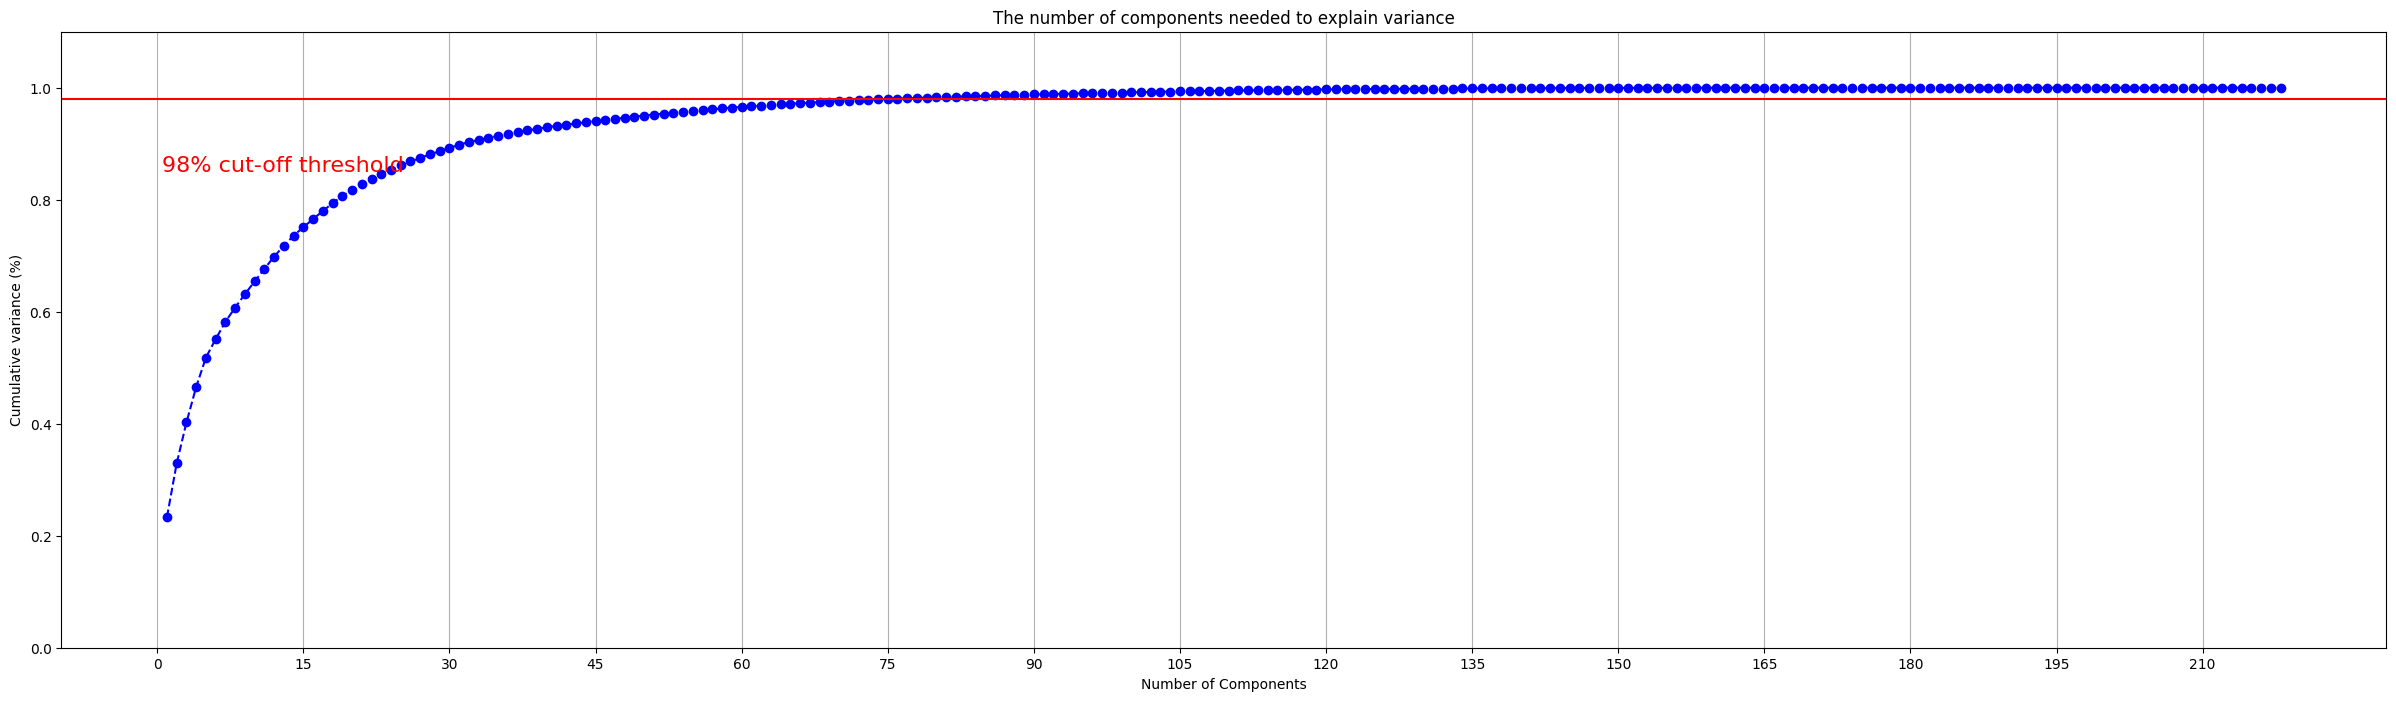

In [122]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(electric_vehicles_attributes_train)
number_of_train_features = electric_vehicles_attributes_train.shape[1]

pca = PCA().fit(data_rescaled)

plt.rcParams["figure.figsize"] = (30,8)

fig, ax = plt.subplots()
xi = np.arange(1, number_of_train_features  + 1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, number_of_train_features , step=15))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.98, color='r', linestyle='-')
plt.text(0.5, 0.85, '98% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Base on the results the __n_components__ schould be between 50 and 60. We wll use the value 60.

In [123]:
N_COMPONENTS = 140 #60 check the run 8

vehicles_pipeline = Pipeline( steps = [
    #('features', features_vehicles_pipeline), 
    ('scaling', MinMaxScaler()),
    ('psa', PCA(n_components=N_COMPONENTS)),
    #('model_logistic_regression', LogisticRegression()),
]) 


In [124]:
vehicles_pipeline.fit(electric_vehicles_attributes_train, electric_vehicles_labels_train)

Pipeline(steps=[('scaling', MinMaxScaler()), ('psa', PCA(n_components=140))])

In [125]:
# each of these models will take a turn as the second Pipeline step
#clf1 = LogisticRegression(solver='liblinear', random_state=1)
clf_lr = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf_svc = SVC(random_state=1)
clf_dtc = DecisionTreeClassifier(random_state=1)



In [126]:
# create the Pipeline
#pipe = Pipeline([('preprocessor', vehicles_pipeline), ('classifier', clf_lg)])
pipe_classifier = Pipeline(steps = [('preprocessor', vehicles_pipeline), ('classifier', clf_lr)])



__Remark__: using the params1['classifier__max_iter'] = [1000] the fit process took a lot of time (mose as 12 hours and the fit process was not done)

In [127]:
# create the parameter dictionary for LogisticRegression

#‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
#‘liblinear’ and ‘saga’ also handle L1 penalty

params_lr = {
    'classifier__penalty': ['l2'],
    'classifier__C':  [0.001, 0.01, 0.1, 1, 10, 100, 1000.0, 1e10],
    'classifier': [clf_lr]
}

#params1['classifier__penalty'] = ['l2']
#params1['classifier__C'] = [0.001, 0.01, 0.1, 1, 10, 100, 1000.0, 1e10]
#params1['classifier__solver'] = ['liblinear', 'lbfgs']
#params1['classifier__max_iter'] = [100]
#params1['classifier'] = [clf1]



In [128]:
# create the parameter dictionary for clf2 -RandomForestClassifier
params2 = {}
params2['classifier__n_estimators'] = [100, 200]
params2['classifier__min_samples_leaf'] = [1, 2]
params2['classifier'] = [clf2]

In [129]:
# create the parameter dictionary for SVC
param_range_svc = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 1e10]

param_svc = [{'classifier__C': param_range_svc, 
                'classifier__kernel': ['linear'],
              'classifier': [clf_svc]
             },  
             {'classifier__C': param_range_svc, 
               'classifier__gamma': param_range_svc, 
               'classifier__kernel': ['rbf'],
               'classifier': [clf_svc]
             }]


In [130]:
param_dtc = {
    'classifier__max_depth': [2,5,10,18,20,25,30, None],
    'classifier': [clf_dtc]
}

In [131]:
# create a list of parameter dictionaries
#params = [params_lr]
#params = param_svc
params = [params_lr]
#params = [params1, params2]

In [132]:


#param_grid = {
#    'model_logistic_regression__penalty': ['l1', 'l2'],
#    'model_logistic_regression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1e10],
#    'model_logistic_regression__solver': ['liblinear', 'lbfgs'],
#    'model_logistic_regression__max_iter': [100],
#    'model_logistic_regression__n_components': [60],
#}



# this will search every parameter combination within each dictionary
#grid = GridSearchCV(pipe, params)
#grid.fit(X, y)
#grid.best_params_



#grid_search = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=100), param_grid, cv=5)
#grid_search = GridSearchCV(pipe, params, cv=5)
#grid_search = GridSearchCV(pipe_classifier, params, scoring='accuracy', cv=10)
grid_search = GridSearchCV(pipe_classifier, params, cv=5)
grid_search.fit(electric_vehicles_attributes_train, electric_vehicles_labels_train)


C:\Users\David_Ninov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David_Ninov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('scaling',
                                                         MinMaxScaler()),
                                                        ('psa',
                                                         PCA(n_components=140))])),
                                       ('classifier',
                                        LogisticRegression(random_state=1))]),
             param_grid=[{'classifier': [LogisticRegression(random_state=1)],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                            1000.0, 10000000000.0],
                          'classifier__penalty': ['l2']}])

In [133]:
#print(f"Feature Importances: {grid_search.feature_importances_}")

In [134]:
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'classifier': LogisticRegression(random_state=1), 'classifier__C': 100, 'classifier__penalty': 'l2'}


In [135]:
print("Best score: ", grid_search.best_score_)

Best score:  0.5790074483104088


In [136]:
grid_search.cv_results_

{'mean_fit_time': array([1.98244677, 2.20639982, 2.92864246, 3.0560874 , 3.10799909,
        3.02226224, 3.04727907, 3.06149774]),
 'std_fit_time': array([0.0690174 , 0.07465339, 0.07151973, 0.0602814 , 0.02609463,
        0.02826019, 0.0301463 , 0.07589968]),
 'mean_score_time': array([0.04858217, 0.05051885, 0.0467557 , 0.05120182, 0.04785805,
        0.05086536, 0.0468235 , 0.05100079]),
 'std_score_time': array([0.00491544, 0.00653528, 0.00232258, 0.00322065, 0.00329628,
        0.00187837, 0.00459384, 0.00140005]),
 'param_classifier': masked_array(data=[LogisticRegression(random_state=1),
                    LogisticRegression(random_state=1),
                    LogisticRegression(random_state=1),
                    LogisticRegression(random_state=1),
                    LogisticRegression(random_state=1),
                    LogisticRegression(random_state=1),
                    LogisticRegression(random_state=1),
                    LogisticRegression(random_state=1)],
     

In [137]:
electric_vehicles_labels_pred = grid_search.predict(electric_vehicles_attributes_test)

In [138]:
electric_vehicles_labels_pred

array([3., 3., 3., ..., 2., 2., 3.])

In [139]:
grid_search.score(electric_vehicles_attributes_train, electric_vehicles_labels_train)

0.5911600456910775

In [140]:
grid_search.score(electric_vehicles_attributes_test, electric_vehicles_labels_test)

0.5870289479529133

In [141]:
grid_search.best_index_

5

In [142]:
scores = cross_val_score(pipe_classifier, electric_vehicles_attributes_train, electric_vehicles_labels_train, cv=10, scoring='accuracy', n_jobs=1)

C:\Users\David_Ninov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David_Ninov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

In [143]:
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.56821066 0.57709391 0.5840736  0.58248731 0.56313452 0.56694162
 0.58362425 0.57569026 0.5706125  0.58679784]
CV accuracy: 0.576 +/- 0.008


In [144]:
confmat = confusion_matrix(y_true=electric_vehicles_labels_test, y_pred=electric_vehicles_labels_pred)
print(confmat)

[[1631  756 2144   25]
 [  45 1227 1101    0]
 [ 914  142 4954  124]
 [ 127    0  200  117]]


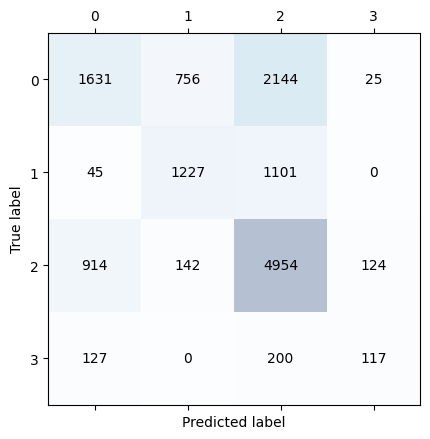

In [145]:
fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/.png', dpi=300)
plt.show()



 1) Model Year                     0.265336
 2) DOL Vehicle ID                 0.116135
 3) VIN (1-10)                     0.097162
 4) Postal Code                    0.045277
 5) Longitude                      0.042954
 6) Latitude                       0.042632
 7) Legislative District           0.032199
 8) City_priority                  0.029856
 9) 2020 Census Tract              0.027744
10) Price_Range_Category           0.024342
11) x0_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA) 0.016697
12) x0_PUGET SOUND ENERGY INC      0.013907
13) x0_CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA) 0.013227
14) County_priority                0.013128
15) x0_MODEL 3                     0.008629
16) x0_TESLA                       0.007474
17) x0_BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA) 0.007209
18) x0_MODEL S                     0.006753
19) x0_BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY 0.005944
20) x0_Battery Electric Vehicle (BEV) 0.

C:\Users\David_Ninov\AppData\Local\Temp\ipykernel_11444\1225790261.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


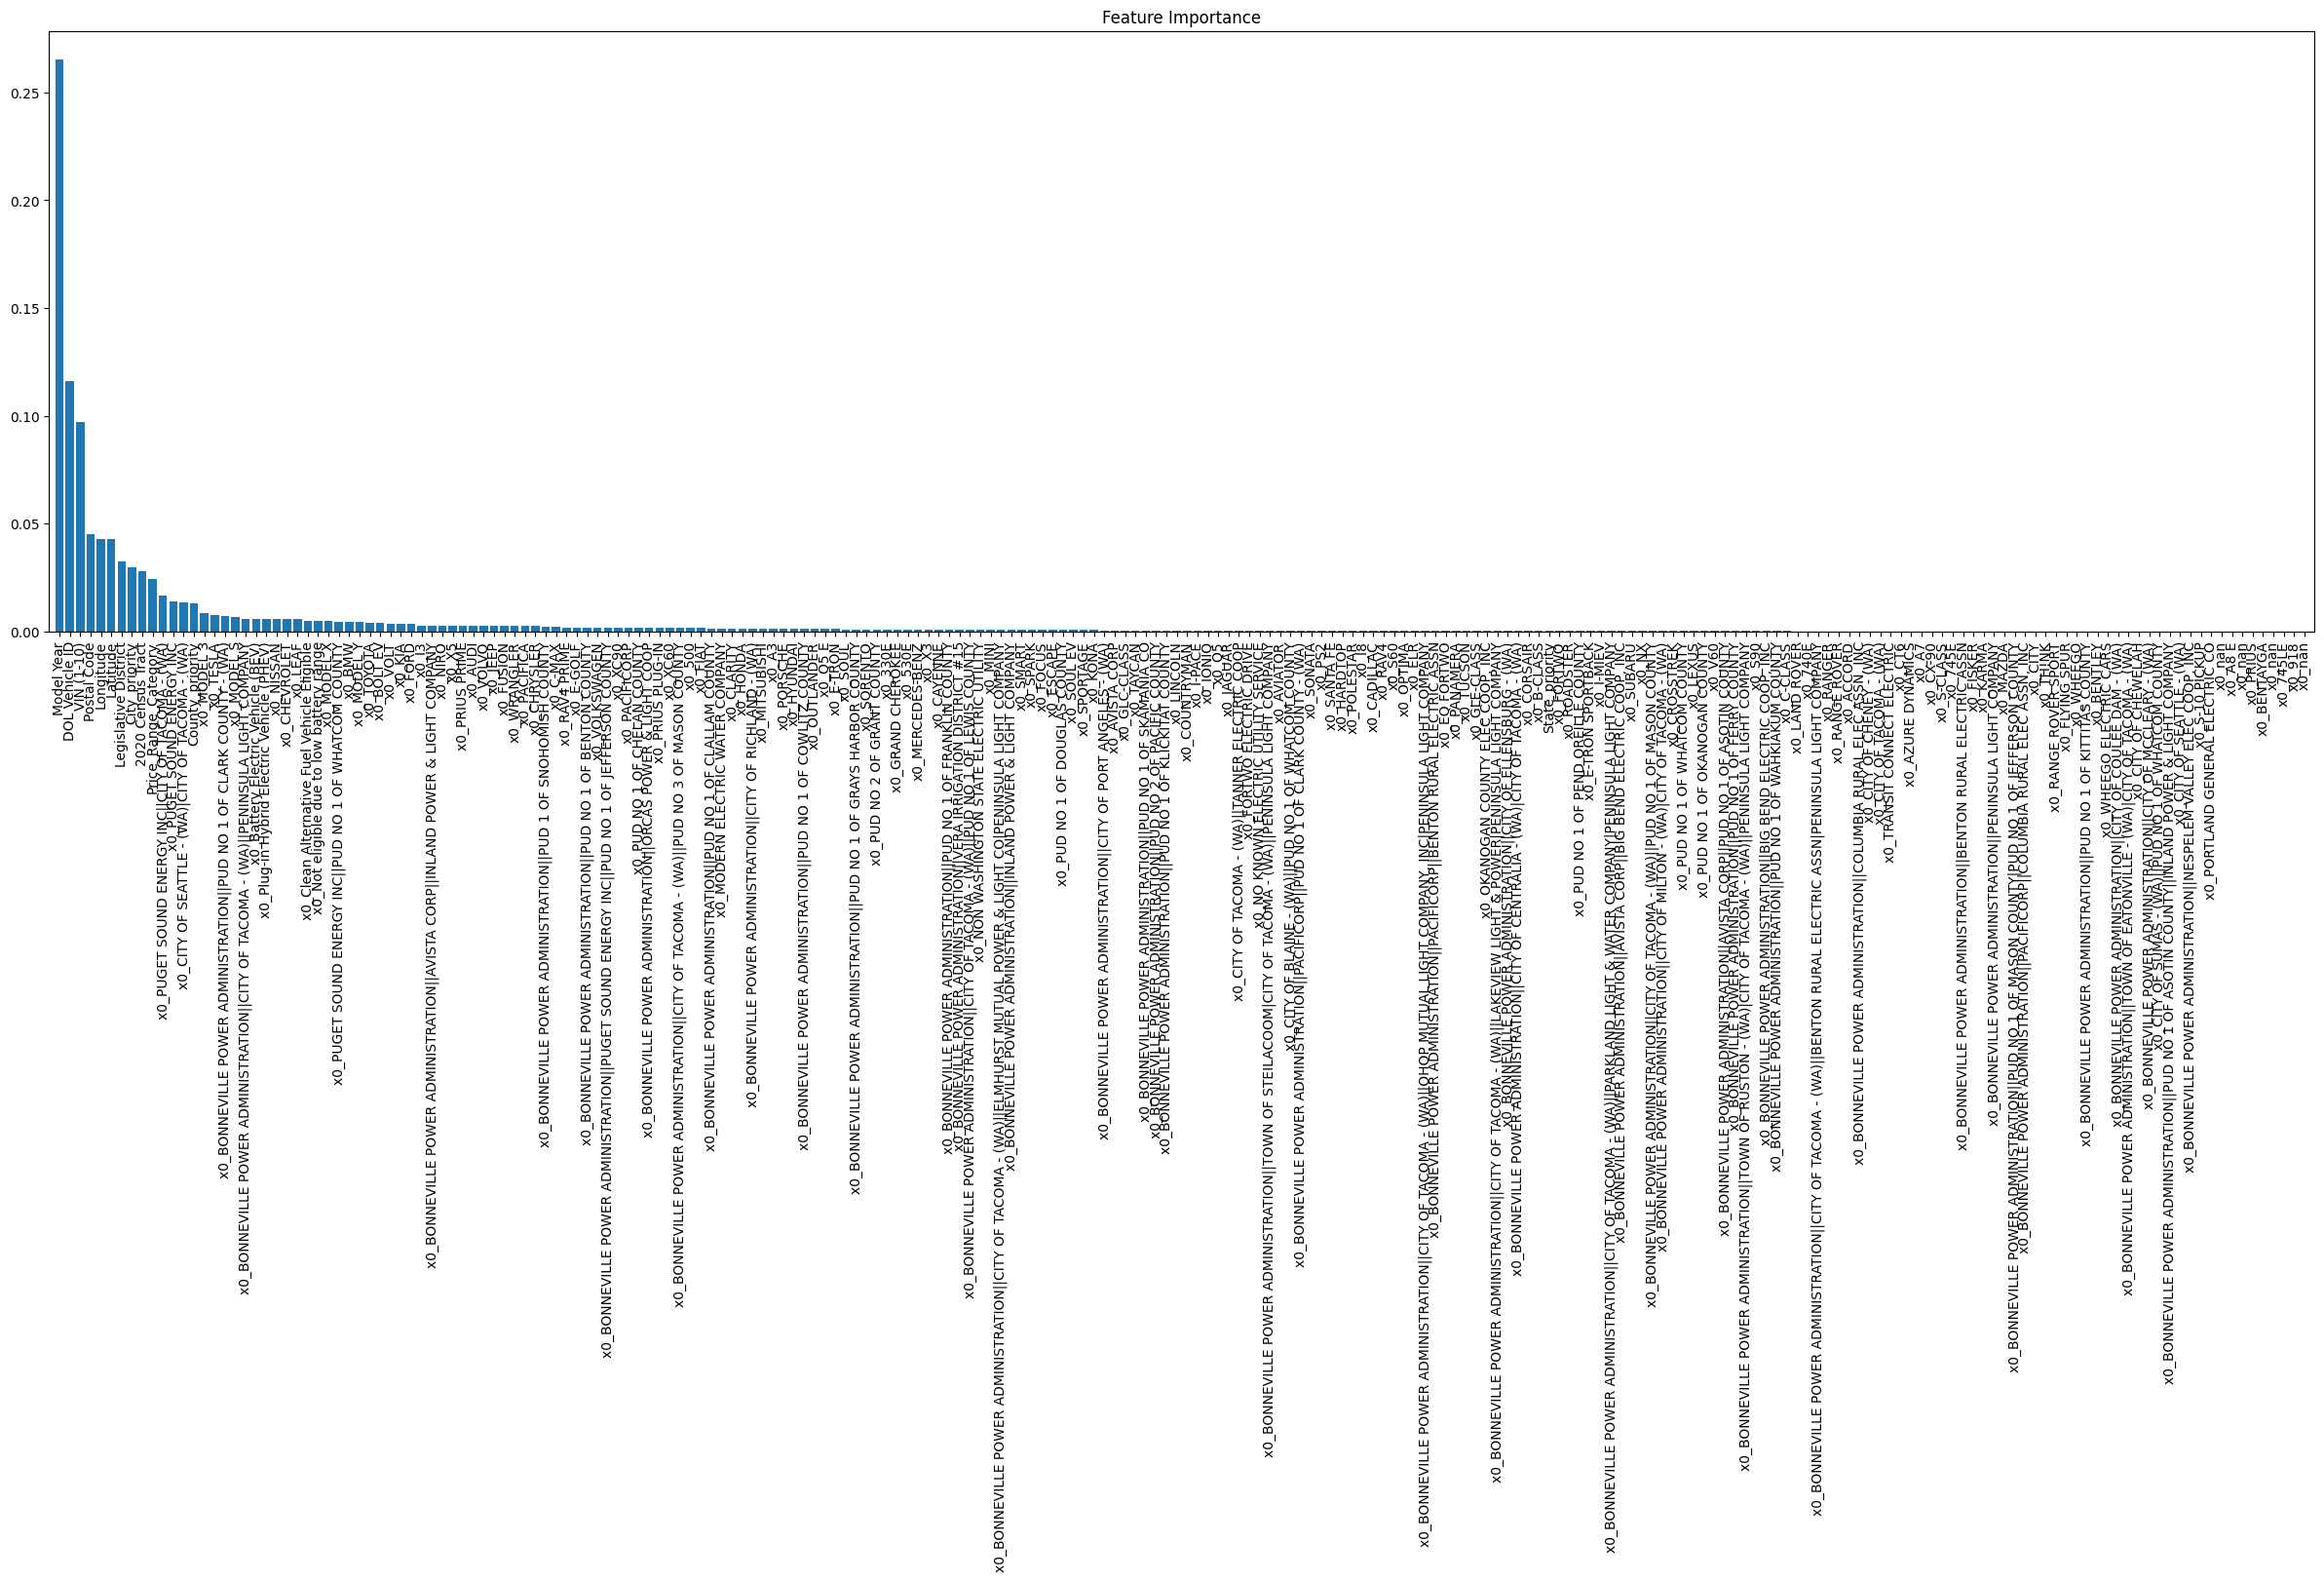

In [146]:

feat_labels = electric_vehicles_attributes_train.columns[0:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(electric_vehicles_attributes_train, electric_vehicles_labels_train)
#forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(electric_vehicles_attributes_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(electric_vehicles_attributes_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(electric_vehicles_attributes_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, electric_vehicles_attributes_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()



In [147]:
mlflow.log_artifact("data/Electric_Vehicle_Population_Data.csv")

In [148]:
 # Evaluate the model
accuracy = accuracy_score(electric_vehicles_labels_test, electric_vehicles_labels_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(electric_vehicles_labels_test, electric_vehicles_labels_pred, average='weighted')

# Print the classification report and confusion matrix for each classifier
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}\n')

Best Hyperparameters: {'classifier': LogisticRegression(random_state=1), 'classifier__C': 100, 'classifier__penalty': 'l2'}
Accuracy: 0.5870
Precision: 0.5862
Recall: 0.5870
F1 Score: 0.5676



In [149]:
print(classification_report(electric_vehicles_labels_test, electric_vehicles_labels_pred))

              precision    recall  f1-score   support

         2.0       0.60      0.36      0.45      4556
         3.0       0.58      0.52      0.55      2373
         4.0       0.59      0.81      0.68      6134
         5.0       0.44      0.26      0.33       444

    accuracy                           0.59     13507
   macro avg       0.55      0.49      0.50     13507
weighted avg       0.59      0.59      0.57     13507



Base on this resilts we have consider cross-validation or testing on a separate dataset to ensure the generalization of the model.

In [150]:
 grid_search.best_params_

{'classifier': LogisticRegression(random_state=1),
 'classifier__C': 100,
 'classifier__penalty': 'l2'}

In [151]:
#Parameters
mlflow.log_param("train_test_split", True)
mlflow.log_param("random_state", RANDOM_STATE)
mlflow.log_param("test_size", TEST_SIZE) 
mlflow.log_param("n_components", N_COMPONENTS)
mlflow.log_param("Best parameters", grid_search.best_params_)

# Log the best parameters
#mlflow.log_param("C", best_params['classifier__C'])
#mlflow.log_param("penalty", best_params['classifier__penalty'])

# Log the model
#mlflow.sklearn.log_model("LogisticRegression", "model")
#mlflow.log_model("LogisticRegression", "model")
#mlflow.log_

 # Infer the model signature
#signature = infer_signature(electric_vehicles_attributes_test, electric_vehicles_labels_pred)

mlflow.sklearn.log_model(
        sk_model=grid_search,
        artifact_path="sklearn-model",
 #       signature=signature,
        registered_model_name="DecisionTreeClassifier",
    )

# Metics
for train_step in range(100):
    mlflow.log_metric("test_metrics", train_step **2, step = train_step) # accuracy

mlflow.log_metrics({"mse": mean_squared_error(electric_vehicles_labels_test, electric_vehicles_labels_pred)})
mlflow.log_metrics({"Correct classification Rate Training data": grid_search.score(electric_vehicles_attributes_train,electric_vehicles_labels_train)})
mlflow.log_metrics({"Correct classification Rate Test data": grid_search.score(electric_vehicles_attributes_test,electric_vehicles_labels_test)})
mlflow.log_metrics({"Accuracy": accuracy})
mlflow.log_metrics({"Precision" : precision})
mlflow.log_metrics({"Recall" : recall})
mlflow.log_metrics({"F1 Score" : f1_score}) 
#mlflow.log_metrics({"CV accuracy scores" : scores)})
mlflow.log_metrics({"CV accuracy" : np.mean(scores)})
mlflow.log_metrics({"CV accuracy standard deviation" : np.std(scores)})
#mlflow.log_metrics({"Best Estimator" : grid_search.best_estimator_})


#mlflow.log_metrics({"Feature Importance" : importances})


Registered model 'DecisionTreeClassifier' already exists. Creating a new version of this model...
Created version '12' of model 'DecisionTreeClassifier'.


In [152]:
mlflow.end_run()